# Imports

In [1]:
!pip install pycaret &> /dev/null

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)

In [3]:
from pycaret.utils import version
from pycaret.datasets import get_data
from collections import defaultdict

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# pycaret version
version() 

'3.3.1'

# Reading the Data

In [6]:
available_datasets= get_data()

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [7]:
df= get_data('satellite')

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [9]:
df.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361,3.668687
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274,2.214052
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,2.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


In [10]:
df['Class'].value_counts()

Class
1    1533
7    1508
3    1358
5     707
2     703
4     626
Name: count, dtype: int64

# Data Preprocessing

In [11]:
df.isna().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
Class          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
n_samples = 10
df_len = len(df)
part_size = df_len // n_samples  
samples_list = []

# Divide the dataset into 'n_samples' equal parts
for i in range(n_samples):
    start_index = i * part_size
    end_index = (i + 1) * part_size if i < (n_samples-1) else df_len  # Adjust end index for the last part
    part = df.iloc[start_index:end_index]  
    samples_list.append(part)

In [14]:
len(samples_list[0])

643

In [15]:
samples_list[0].head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [16]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

In [17]:
for i in range(n_samples):
    X = samples_list[i].drop('Class', axis= 1)
    y = samples_list[i]['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

In [18]:
for i in range(n_samples):
    scaler = StandardScaler()
    X_train_list[i] = scaler.fit_transform(X_train_list[i])
    X_test_list[i] = scaler.transform(X_test_list[i])

# Fitness Function

In [19]:
def fitness(kernel, nu, gamma, i):
    # defining the global lists
    global X_train_list 
    global X_test_list 
    global y_train_list 
    global y_test_list 
    
    # defining the SVM model
    model = SVC(kernel= kernel, C= nu, gamma= gamma)
    model.fit(X_train_list[i],y_train_list[i])
    pred = model.predict(X_test_list[i])
    accuracy = np.round(accuracy_score(y_test_list[i], pred),4)
    
    return accuracy

# Parameter Optimization

In [20]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid'] 
nu_range = np.linspace(0.01, 1.0, num=10)
gamma_range = np.linspace(0.0001, 1.0, num=10)

In [21]:
iterations = 100
best_accuracy_vals = []
best_kernel_vals = []
best_nu_vals = []
best_gamma_vals = []
accuracy_dict = defaultdict(list)

In [22]:
for i in range(n_samples):
    best_accuracy = 0
    best_kernel = ''
    best_nu = 0
    best_gamma = 0
    for j in range(iterations):
        kernel = random.choice(kernel_list)
        nu = np.random.choice(nu_range)
        gamma = np.random.choice(gamma_range)
        accuracy = fitness(kernel, nu, gamma, i)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_nu = nu
            best_gamma = gamma
            
        accuracy_dict[i].append(accuracy)    
     
    best_accuracy_vals.append(best_accuracy)
    best_kernel_vals.append(best_kernel)
    best_nu_vals.append(best_nu)
    best_gamma_vals.append(best_gamma) 

# Observations

In [23]:
sample_names = ['S{}'.format(i+1) for i in range(n_samples)]

In [24]:
result_df = pd.DataFrame({'Sample': sample_names, 'Best Accuracy': best_accuracy_vals, 'Best Kernel': best_kernel_vals,
                         'Best nu': best_nu_vals, 'Best gamma': best_gamma_vals})
result_df

,Sample,Best Accuracy,Best Kernel,Best nu,Best gamma
0,S1,0.9430,poly,0.01,0.5556
1,S2,0.8808,rbf,0.78,0.3334
2,S3,0.9119,linear,0.23,0.1112
3,S4,0.9689,linear,0.89,0.3334
4,S5,0.9637,poly,0.01,0.5556
5,S6,0.8964,poly,0.67,0.5556
6,S7,0.9016,poly,0.78,0.2223
7,S8,0.9689,poly,1.00,0.7778
8,S9,0.9741,linear,0.12,0.4445
9,S10,0.9538,linear,0.34,0.0001


In [25]:
best_model_index = np.argmax(np.array(best_accuracy_vals))

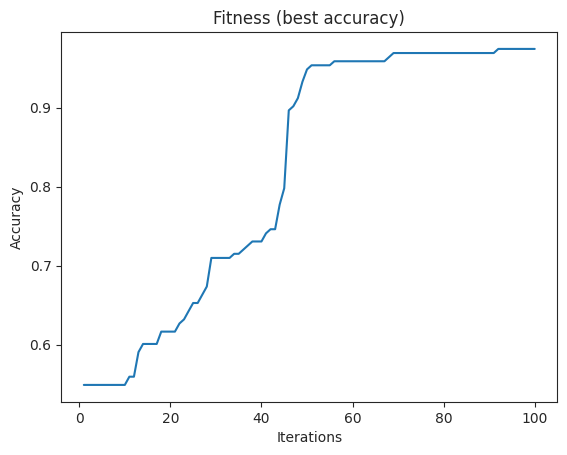

In [26]:
# Convergence graph corresponding to best svm model
sns.set_style('ticks')
plt.plot(range(1,101),sorted(accuracy_dict[best_model_index]))
plt.title('Fitness (best accuracy)')
plt.xlabel('Iterations');
plt.ylabel('Accuracy');

## Thank You!!